In [20]:
%config InlineBackend.figure_format = 'retina'
import beatmap as bt


Isotherm data may be imported from a .csv file using the ``data_import`` function within BEaTmap's io module, or from list objects using the ``import_list_data`` function. 

In either case, the cross sectional area of the adsorbate in square Angstrom, ``a_o``, must be specified. To import from a .csv file, the relative file path must also be specified with the ``file`` parameter. The ``info`` parameter is optional, allowing the user to make notes about the data that will be incorporated into the file names of anything exported by BEaTmap.

The import functions return named tuples with fields containing the isotherm dataframe (iso_df), the adsorbate crossectional area (a_o), information about the data (info), and the file path (file).

As an exercise, we'll import adsorption data for cyclohexane on a Vulcan carbon powder; the cross sectional area of cyclohexane is 39 square Angstrom.

In [21]:
fpath = bt.utils.get_fixtures_path() / 'vulcan_chex.csv'
isotherm_data = bt.io.import_data(file=fpath, info='example data', a_o=39)
isotherm_data._fields


('iso_df', 'a_o', 'info', 'file')

In [22]:
pressures = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.125,
0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6,
0.7, 0.8, 0.9]

amounts = [0, 0.00055797, 0.0006805, 0.00076186, 0.00082042, 0.00086352,
0.00089899, 0.00093262, 0.00095784, 0.00098287, 0.00100306, 0.0010508,
0.00108762, 0.00111806, 0.00114453, 0.00116956, 0.00119198, 0.00121517,
0.00123701, 0.00127731, 0.00132157, 0.00136776, 0.00141743, 0.00147319,
0.00153784, 0.0017082, 0.00198351, 0.00256767]

list_isotherm_data  = bt.io.import_list_data(relp=pressures, n=amounts, a_o=39)


The experimental isotherm data can be plotting using the ``experimental_data_plot`` function by passing the named tuple output by a data import function.

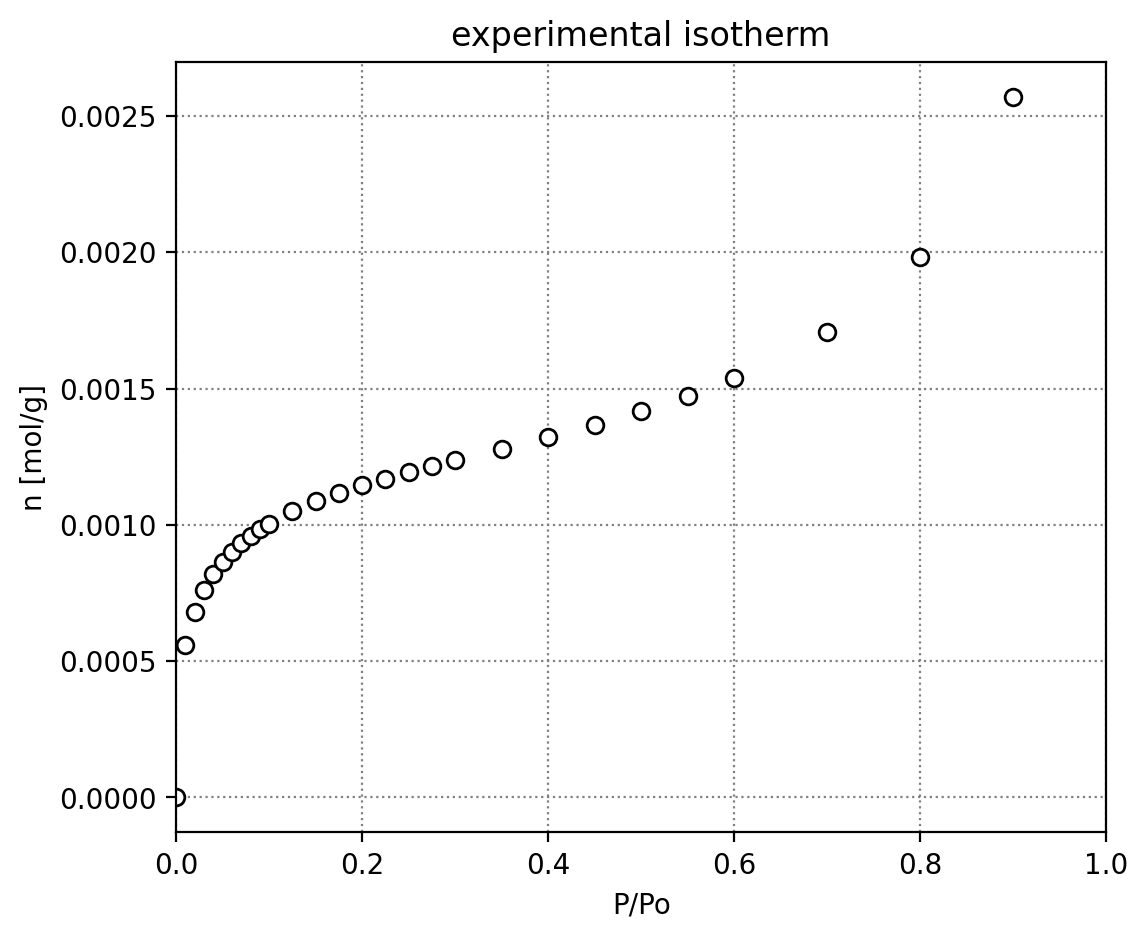

In [23]:
bt.vis.experimental_data_plot(isotherm_data, save_file=False)


BET analysis is performed by the ``bet`` function. The ordering of fields in the named tuples returnted by functions in BEaTmap allows the user to specify each parameter individually, or use Python's \*args functionality.

The ``bet`` function returns a named tuple with fields that contain arrays of BET analysis results, as well as the original isotherm data and info.

In [24]:
bet_results = bt.core.bet(*isotherm_data)
# Alternatively, you can use the following:
# bet_results = bt.core.bet(iso_df=isotherm_data.iso_df, a_o=isotherm_data.a_o, info=isotherm_data.info)
bet_results._fields


('intercept',
 'iso_df',
 'nm',
 'slope',
 'ssa',
 'c',
 'err',
 'r',
 'num_pts',
 'info')

Applying the Rouquerol criteria is done using the ``rouq_mask`` function. Again, the ordering of fields in the named tuples returnted by functions in BEaTmap allows the user to specify each parameter individually, or use Python's \*args functionality. The function contains parameters for each check, their default value is ``True``.

The ``rouq_mask`` function returns a named tuple with fields that contain a numpy mask object and arrays for each check.

In [63]:
# Default arguements are being shown for completeness
mask_results = bt.core.rouq_mask(
    intercept=bet_results.intercept,
    iso_df=bet_results.iso_df,
    nm=bet_results.nm,
    slope=bet_results.slope,
    enforce_y_intercept_positive=True,
    enforce_pressure_increasing=True,
    enforce_absorbed_amount=True,
    enforce_relative_pressure=True,
    enforce_enough_datapoints=True,
    points=5
)

mask_results = bt.core.rouq_mask(*bet_results)


Data visualization functions are within the vis module of BEaTmap. Except for the experimental data plot, all visualizatoin fuctions require the tuples of bet results and mask results. By default these functions will save figures in the same location as the data file, this behavior is controllable with the the ``save_file`` parameter (``save_file=False`` will not save the file).

Heatmaps of specific surface areas and error values can be produced with ``ssa_heatmap`` and ``err_heatmap``, respectively.

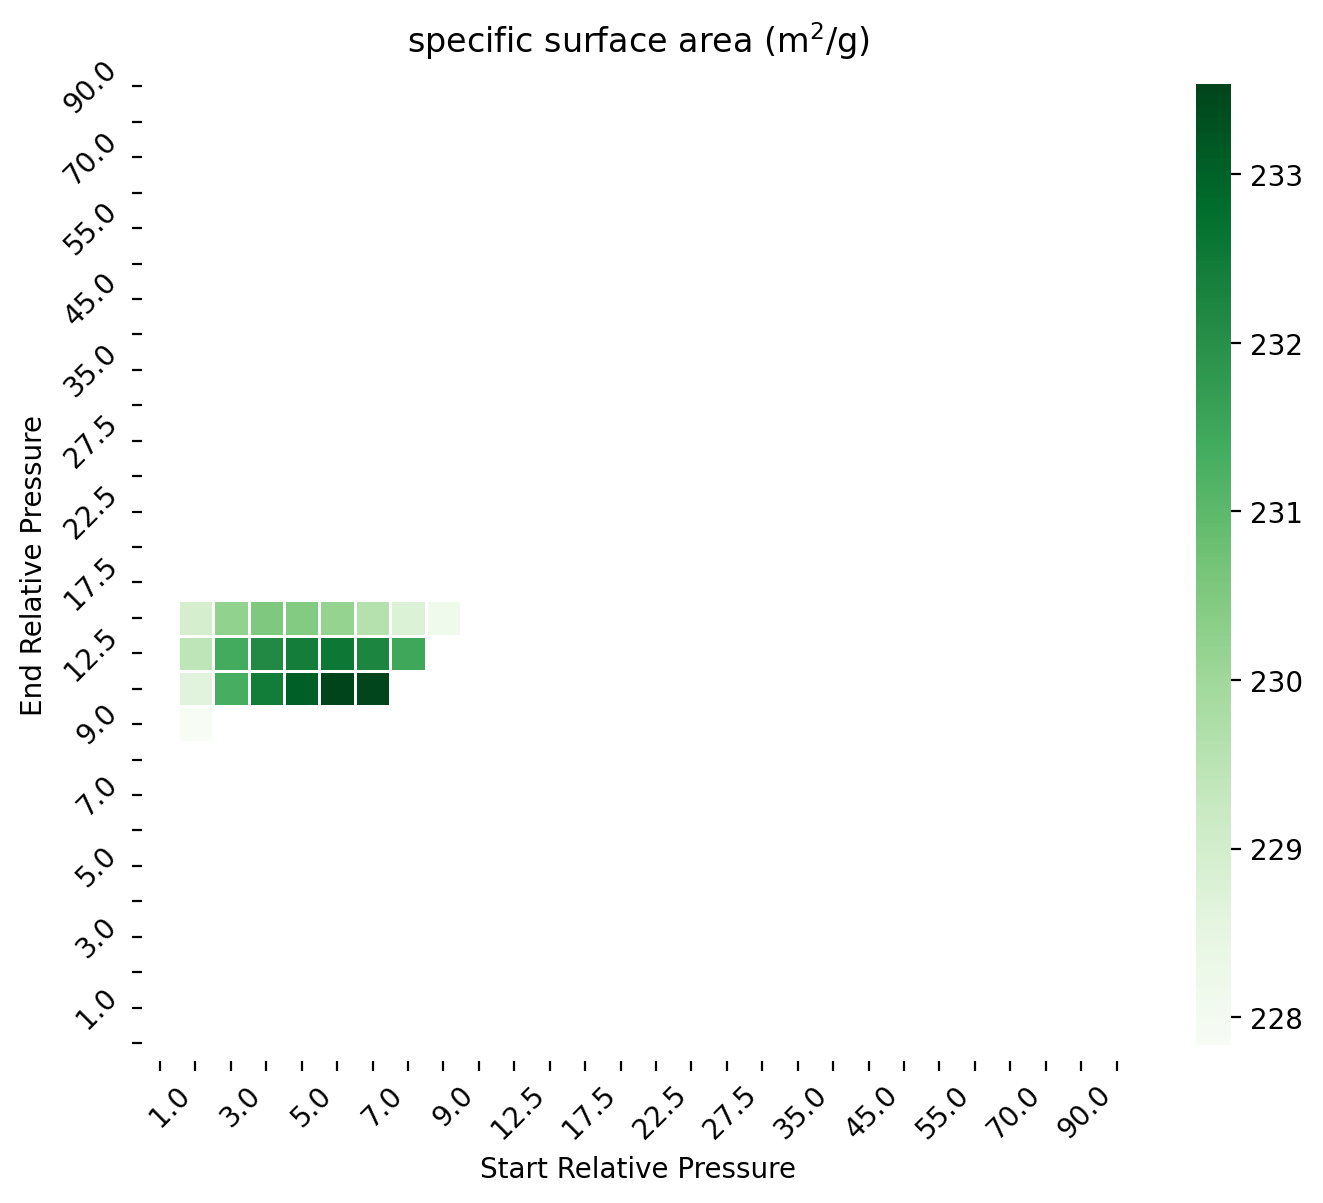

In [41]:
bt.vis.ssa_heatmap(bet_results, mask_results, save_file=False)


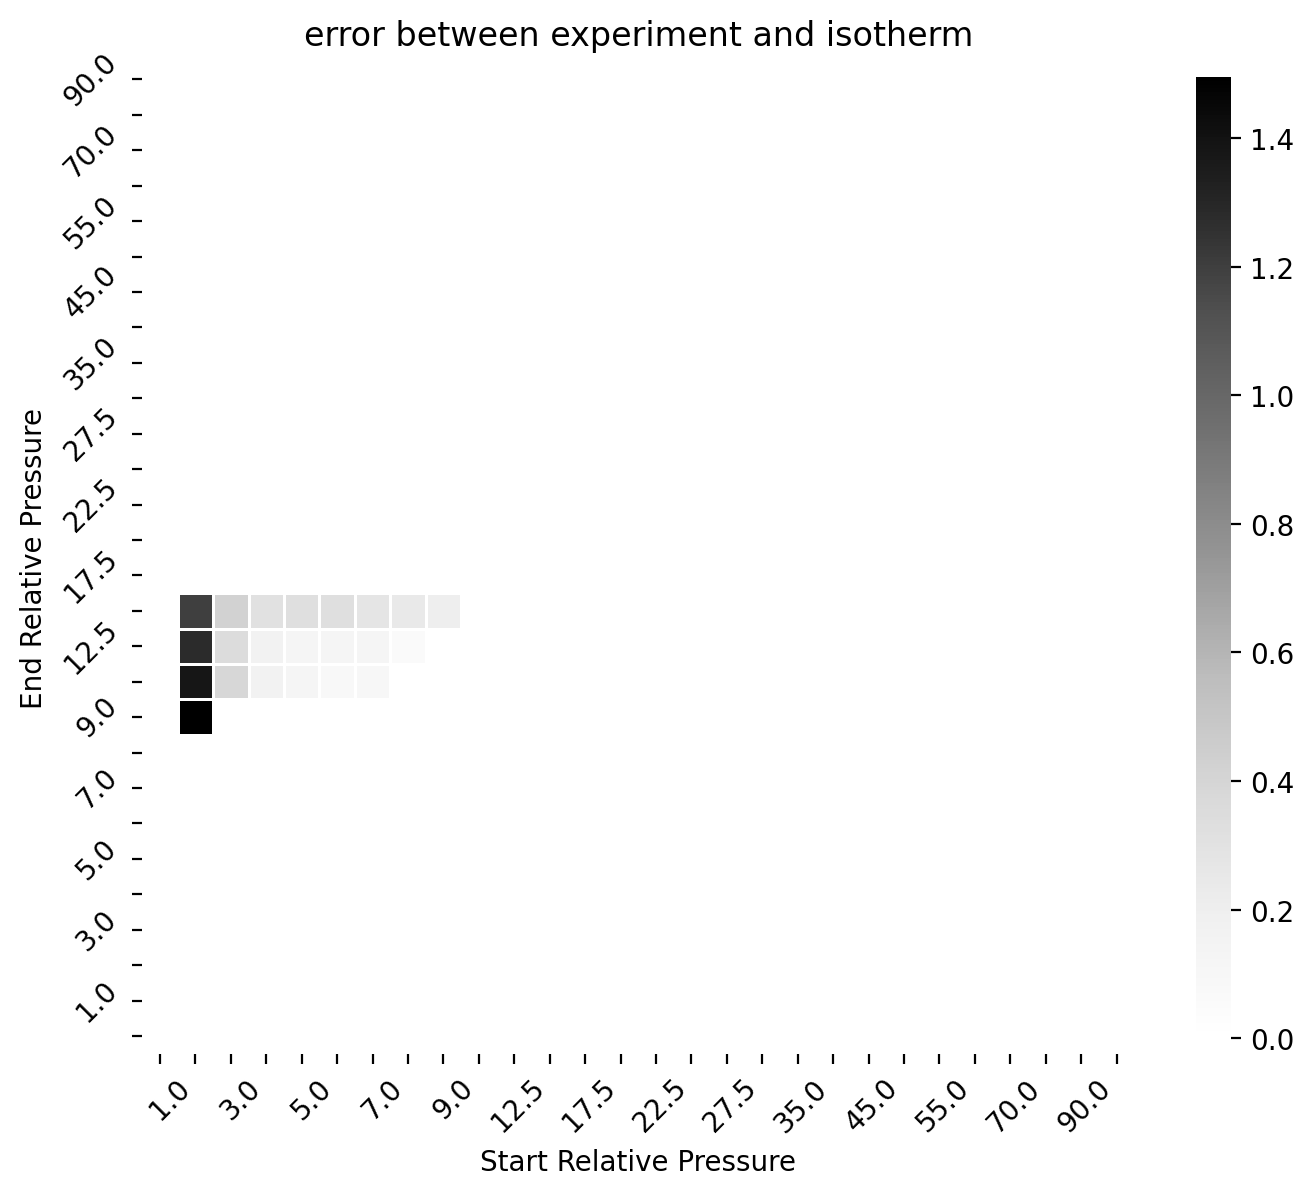

In [42]:
bt.vis.err_heatmap(bet_results, mask_results, save_file=False)


A BET plot featuring the relative pressure intervals with the maximum and minimum error, highlighting the difference between BET analysis of relative pressure intervals, can be produced with the ``bet_combo_plot`` function.

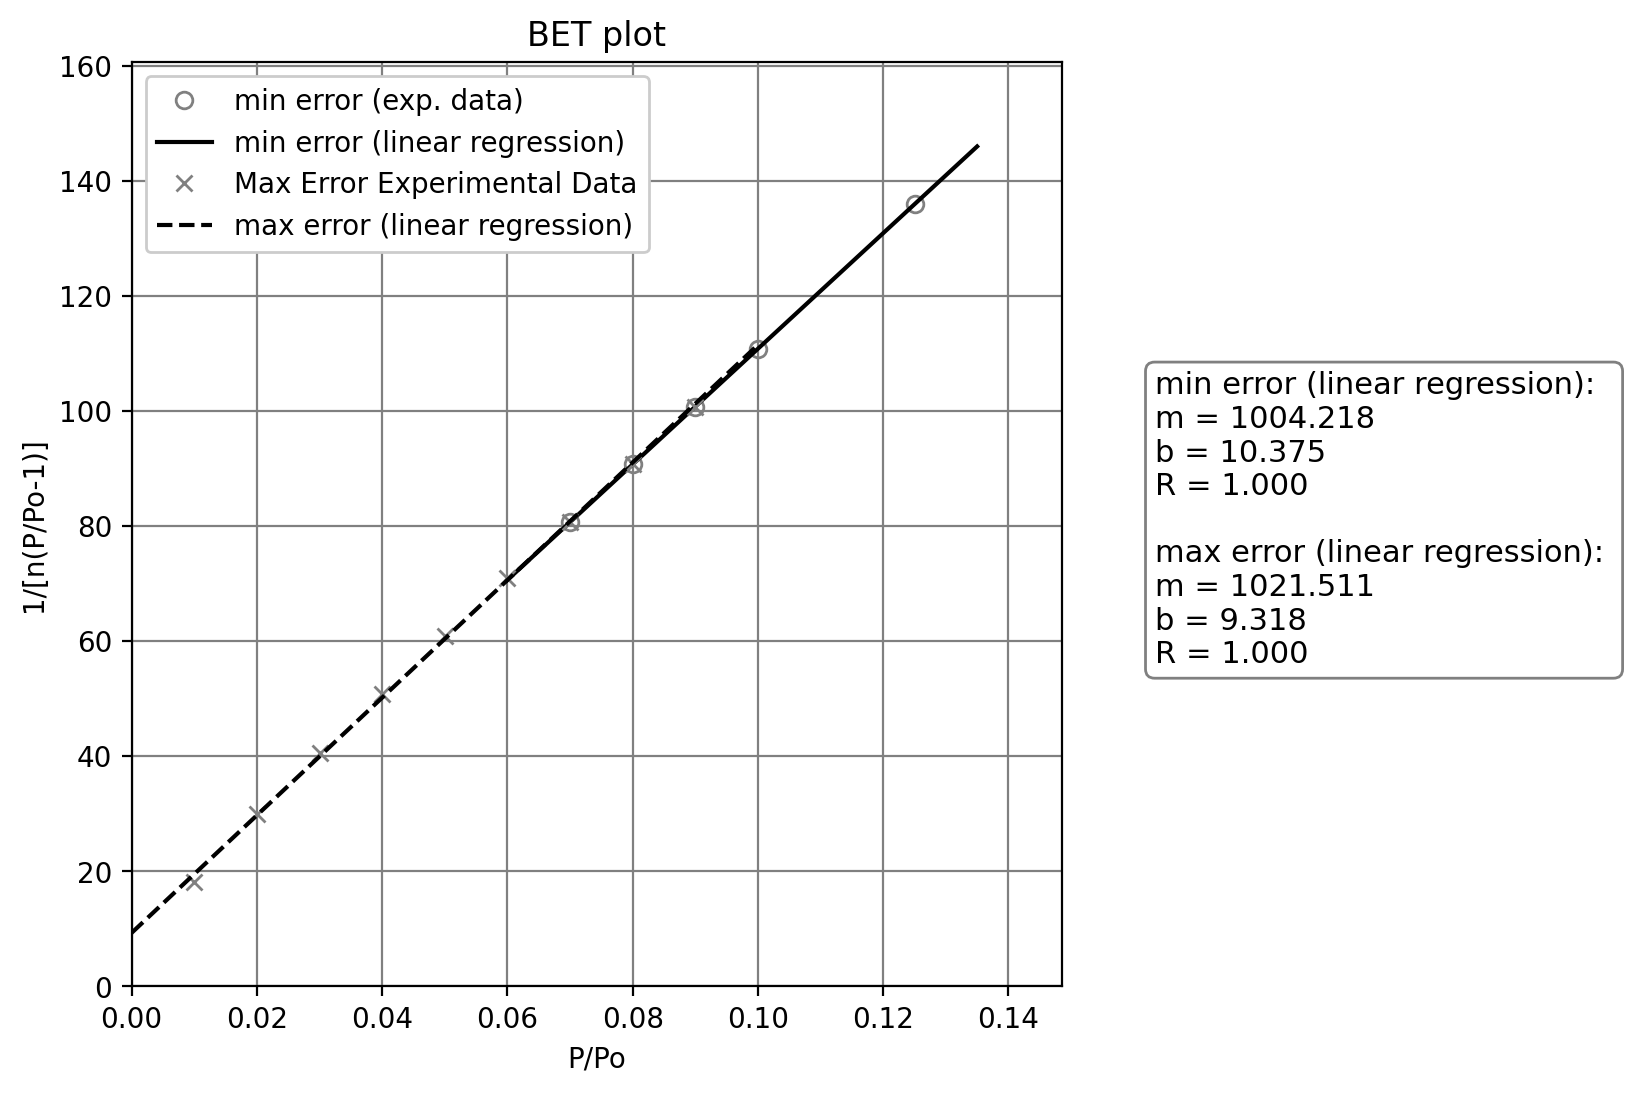

In [53]:
bt.vis.bet_combo_plot(bet_results, mask_results, save_file=False)


A plot of the model isotherm and experimental isothermal adsorption data can be created with the ``iso_combo_plot`` function. The point where monolayer coverage occurs is where n/nm = 1.

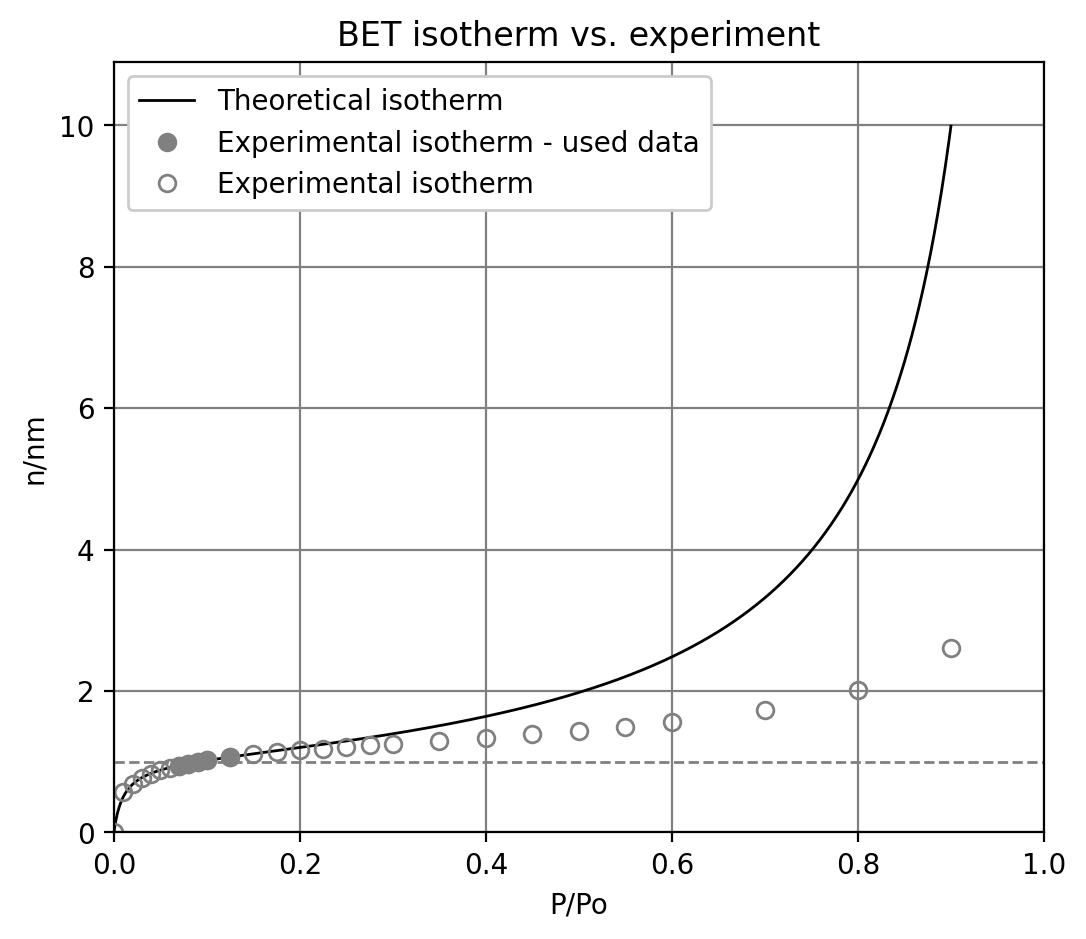

In [58]:
bt.vis.iso_combo_plot(bet_results, mask_results, save_file=False)


Summary tables of simple statistical analysis performed on the BET results can be produced with the ``ascii_tables`` function, or the ``dataframe_tables`` function, depending on the formatting desired by the user.

In [59]:
ssa_table, c_table, ssa_std, c_std = bt.vis.ascii_tables(bet_results, mask_results)
print(ssa_table, '\n\n', c_table)

ssa_df, c_df, ssa_std, c_std = bt.vis.dataframe_tables(bet_results, mask_results)
print(ssa_df, '\n\n', c_df)


+------------+----------+---------+------------+----------+
|            | SSA m2/g |    C    | Start P/Po | End P/Po |
+------------+----------+---------+------------+----------+
|  Min SSA   | 227.834  | 110.627 |    0.01    |   0.09   |
|  Max SSA   | 233.533  |  89.609 |    0.05    |   0.1    |
|  Mean SSA  | 230.857  |   n/a   |    n/a     |   n/a    |
| Median SSA | 230.918  |   n/a   |    n/a     |   n/a    |
+------------+----------+---------+------------+----------+ 

 +-------------+-----------------+---------+------------+----------+-------+
|             | C, BET Constant |   SSA   | Start P/Po | End P/Po | Error |
+-------------+-----------------+---------+------------+----------+-------+
|    Min C    |      89.609     | 233.533 |    0.05    |   0.1    | 0.087 |
|    Max C    |     116.434     |  228.16 |    0.08    |   0.15   | 0.209 |
|    Mean C   |      99.919     |   n/a   |    n/a     |   n/a    |  n/a  |
|   Median C  |      98.518     |   n/a   |    n/a     |   n/

BEaTmap contains an envelope function that imports data, performs BET analysis, applies the Rouquerol criteria, and produces charts and heatmaps in one line, shown below. A named tuple is returned with the results of BEaTmap analysis. Here we are using the `run_beatmap` function to apply only the check 1 criteria in BET analysis.

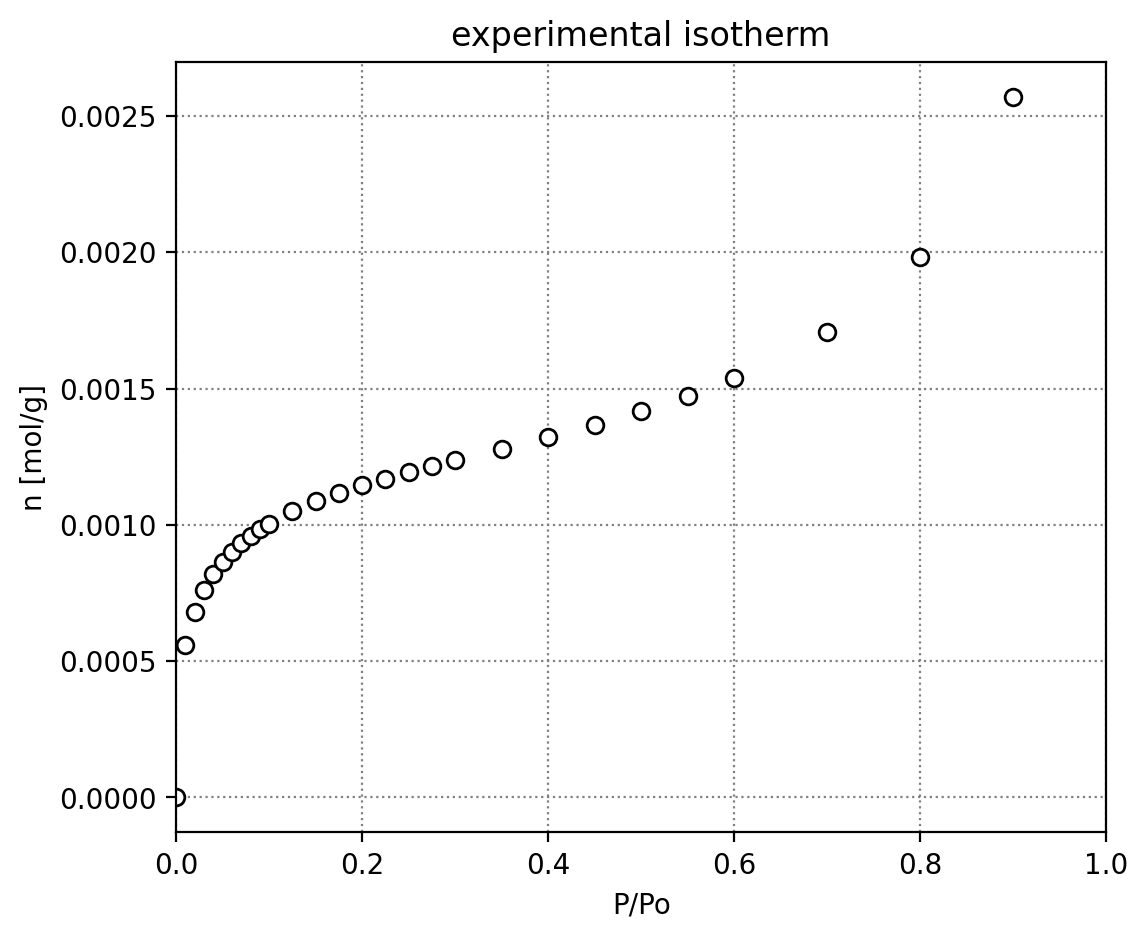

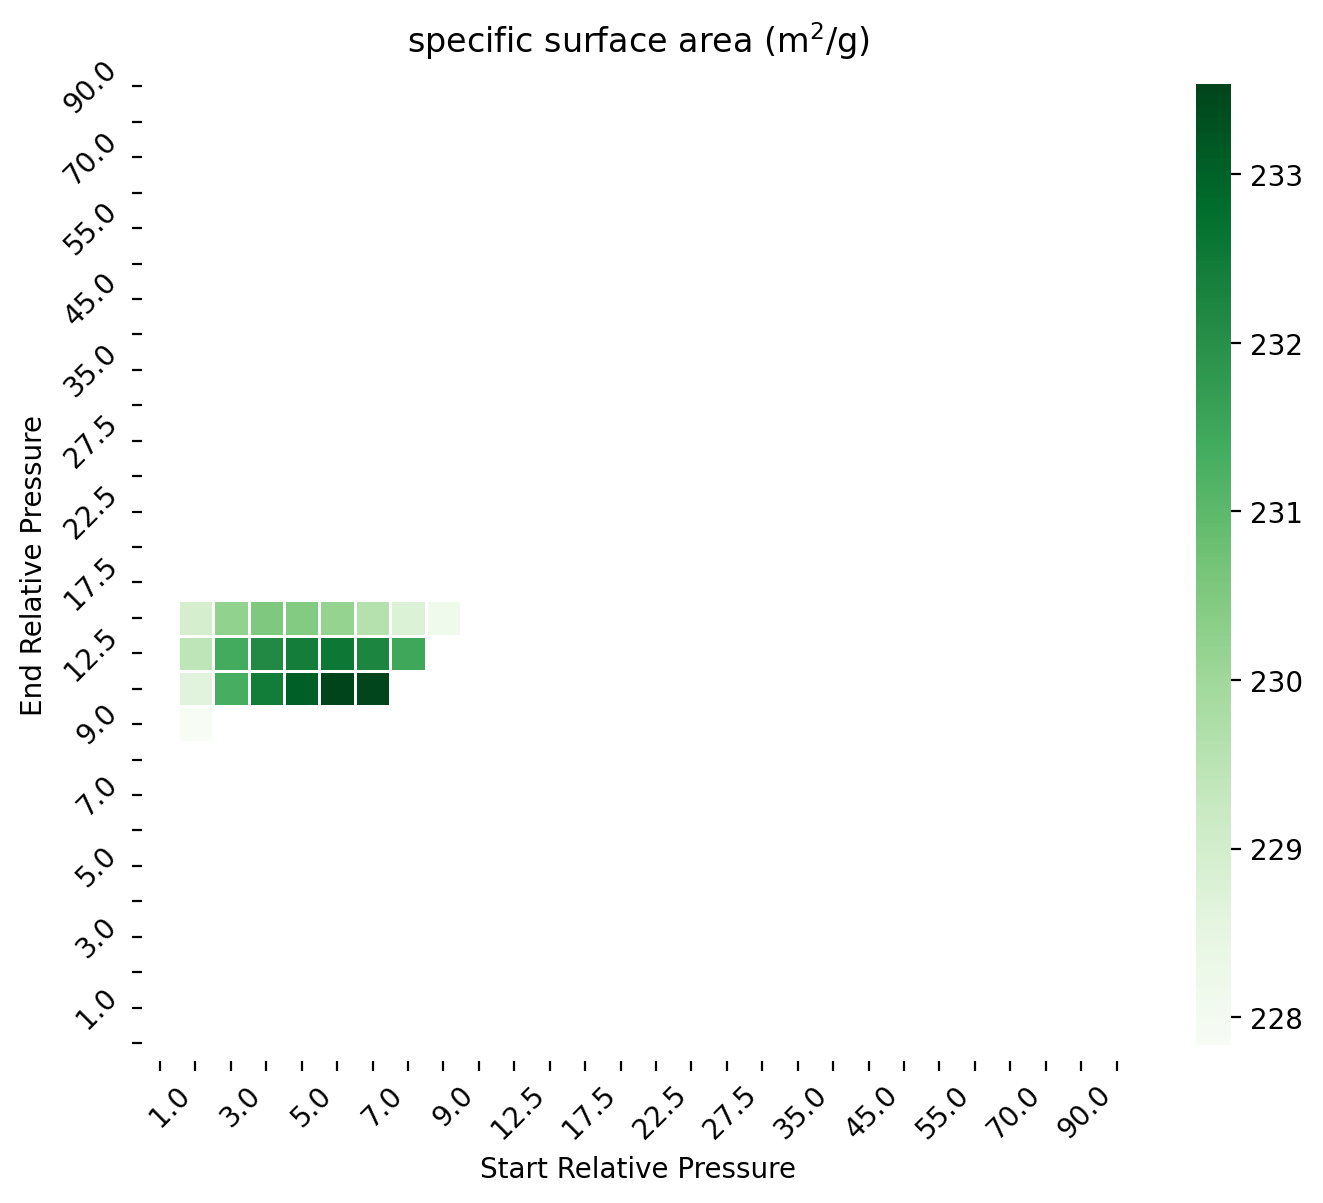

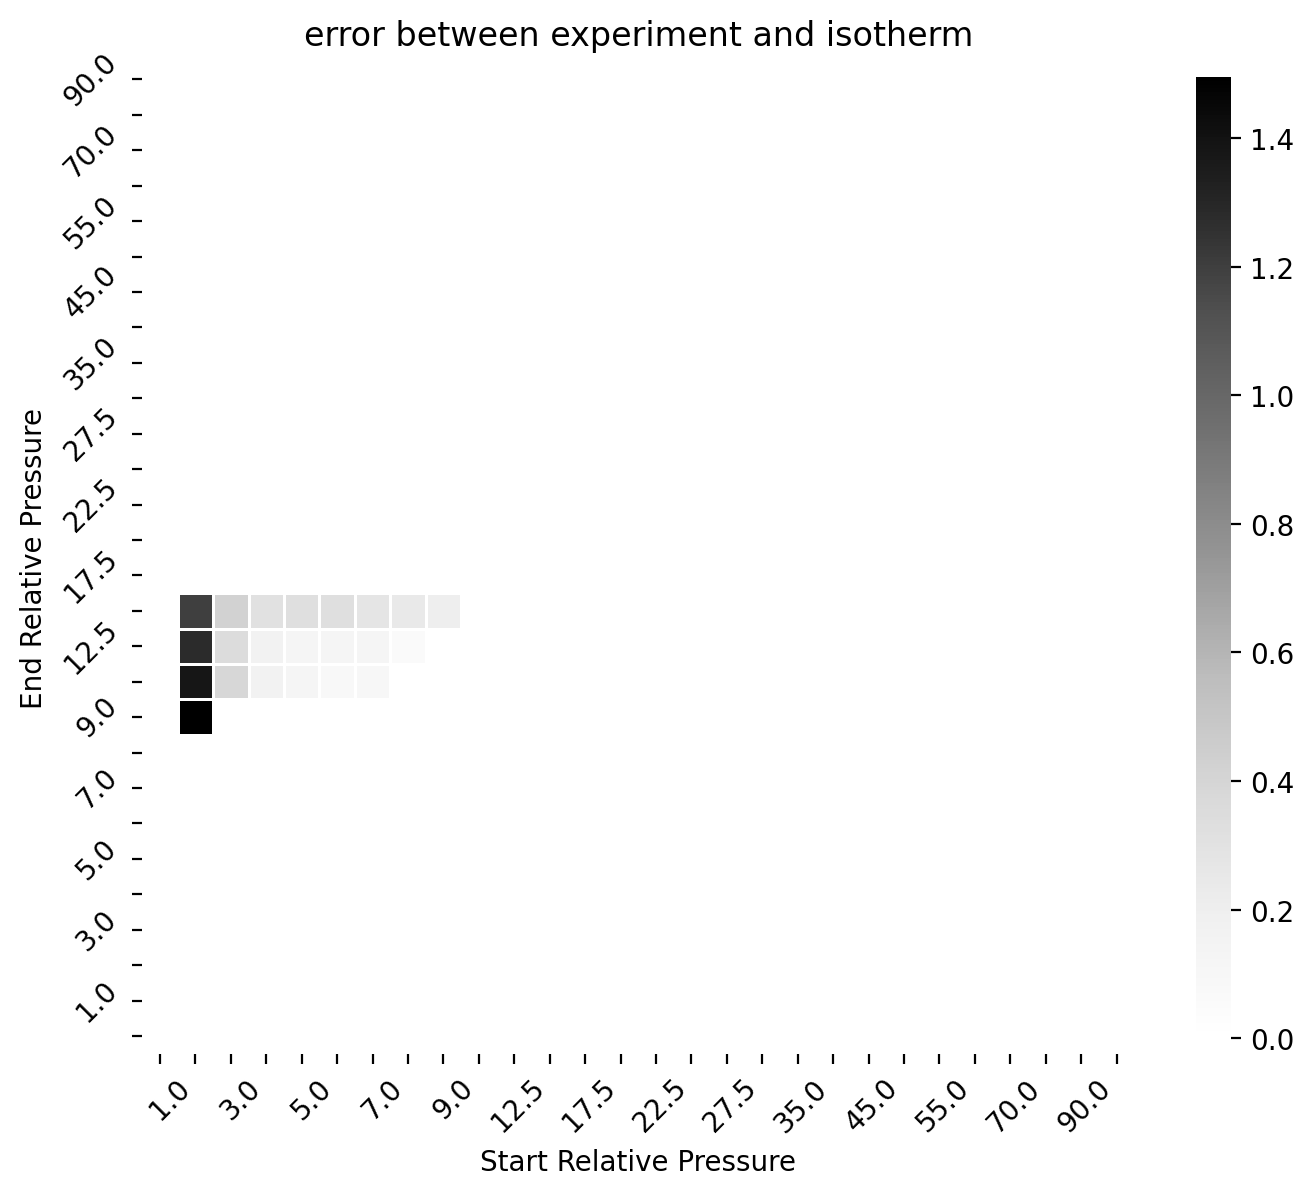

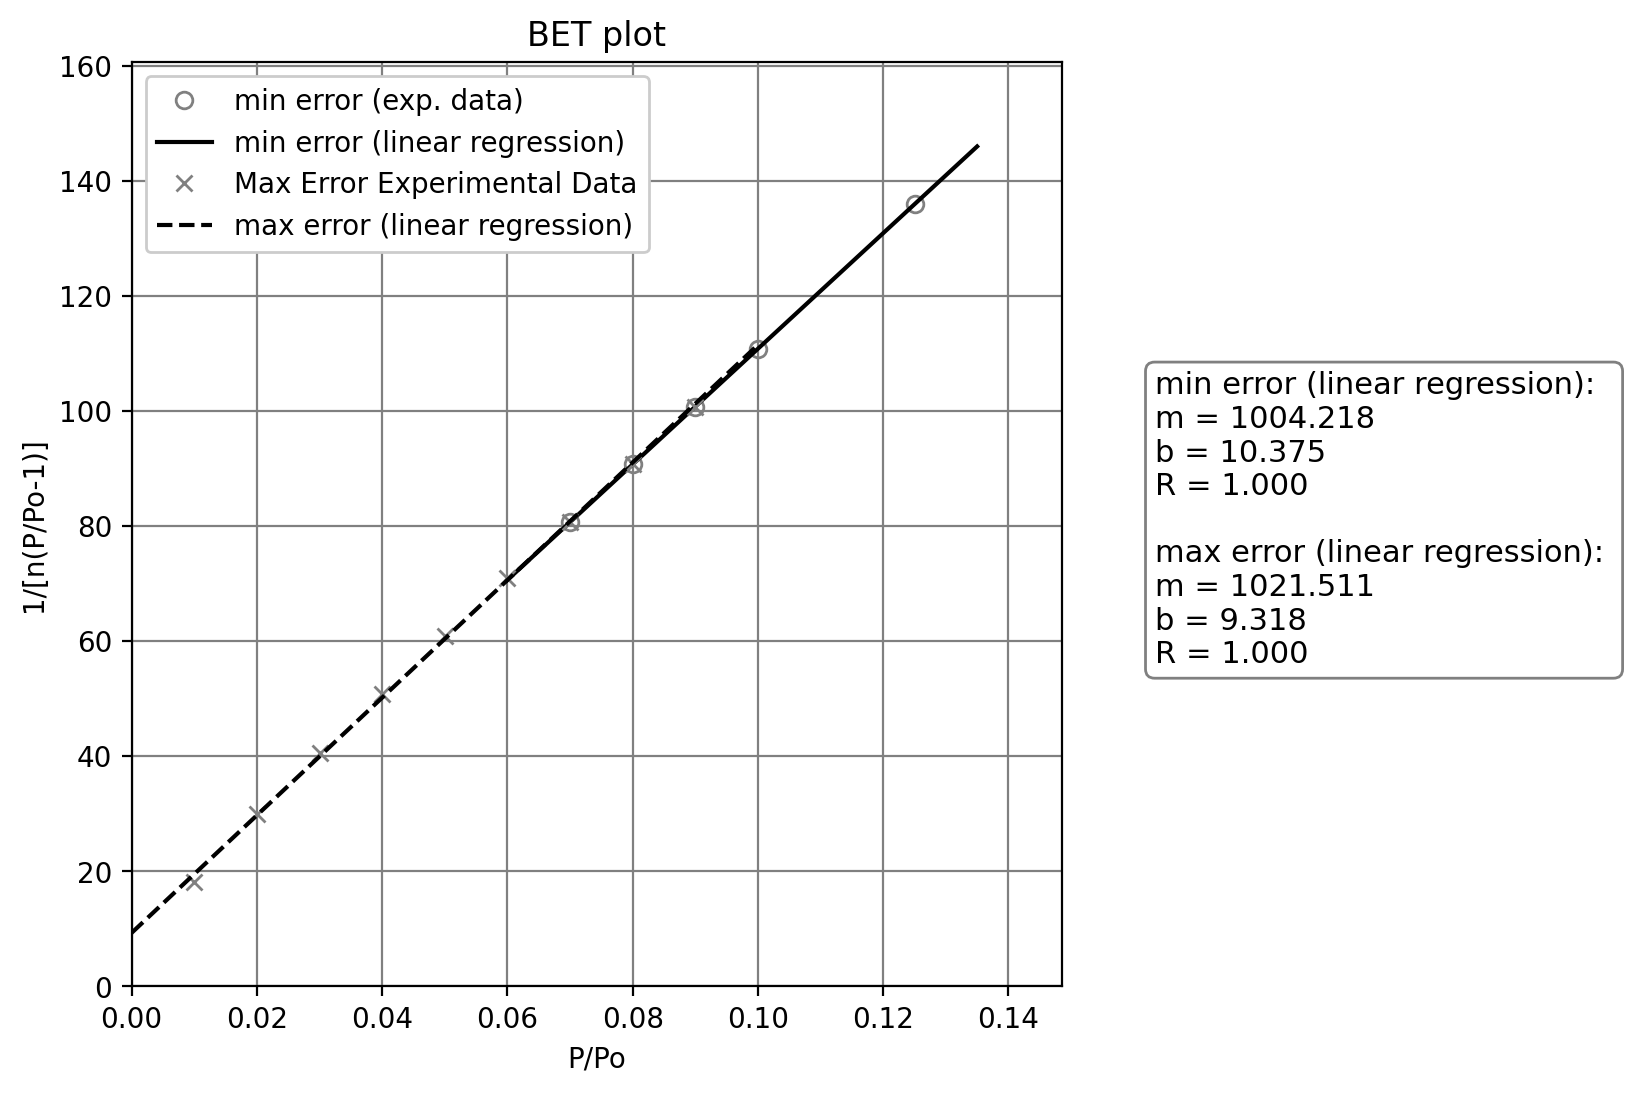

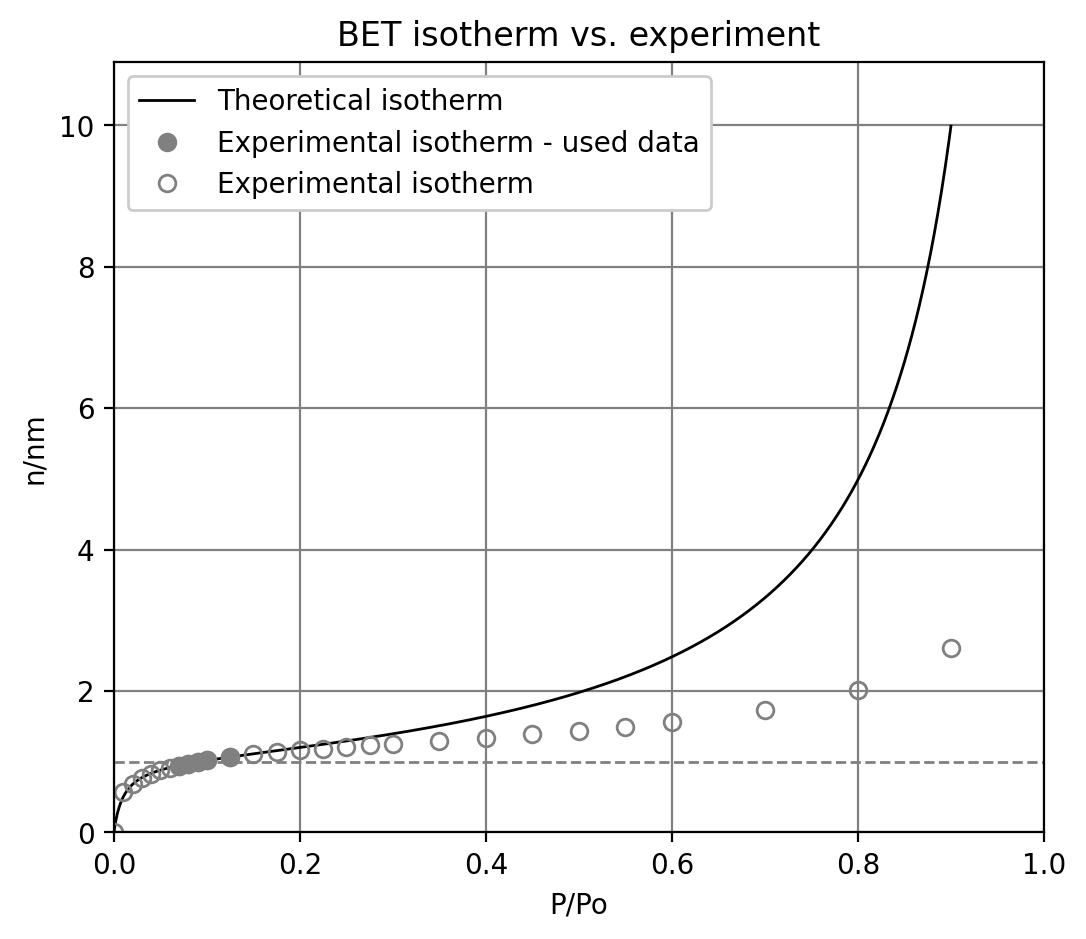

In [65]:
beatmap_results = bt.core.run_beatmap(
    file=fpath, info='example data', a_o=39,
    enforce_y_intercept_positive=True,
    enforce_pressure_increasing=True,
    enforce_absorbed_amount=True,
    enforce_relative_pressure=True,
    enforce_enough_datapoints=True,
    points=5,
    save_figures=False,
    export_data=False,
    ssa_criterion="error",
    ssa_gradient="Greens",
    err_gradient="Greys"
)
